In [2]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost Library
import xgboost as xgb
from xgboost import XGBClassifier

# Scikit-Learn Libraries
import sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Imbalanced-Learn Library
from imblearn.under_sampling import RandomUnderSampler


In [3]:
# loading the cleaned dataset from the ANN notebook
df = pd.read_csv('classification_cleaned.csv')
df.head()

,alpha,delta,cam_col,class,redshift,plate,MJD,photometric_filters
0,135.689107,32.494632,2,0,0.634794,5812,56354,21.431178
1,144.826101,31.274185,5,0,0.779136,10445,58158,22.923626
2,142.188790,35.582444,2,0,0.644195,4576,55592,22.010612
3,338.741038,-0.402828,3,0,0.932346,9149,58039,21.773891
4,345.282593,21.183866,3,0,0.116123,6121,56187,17.387107


In [4]:
df.shape

(100000, 8)

In [5]:
# create X and y
X = df.drop('class', axis=1)
y = df['class']

In [6]:
df['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

In [7]:
# Using the under-sampling method to balance the values of the class column as you can see it previously. all those three values are not balanced
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)


In [8]:
# after using the under-sampling method, lt's check the value counts of the 'class' column
pd.Series(y).value_counts()


class
0    18961
1    18961
2    18961
Name: count, dtype: int64

In [9]:
print("X_train shape:", X.shape)
print("y_train shape:", y.shape)

X_train shape: (56883, 7)
y_train shape: (56883,)


In [10]:
# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(39818, 7)
(39818,)
(17065, 7)
(17065,)


In [12]:
# Creating of the DMatrix object in XGBoost
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)  

In [13]:
# creating the parameters for the XGBoost model.
# since my target column has three values, I will use the multi:softmax objective function
params = {
    'max_depth': 10,
    'objective': 'multi:softmax',
    'num_class': 3,
    'tree_method': 'hist',
}


In [14]:
# training the model with the parameters and the DMatrix object
bst = xgb.train(params, dtrain)

In [15]:
# making predictions
preds = bst.predict(dtest)


In [16]:
# Evaluating the model using the classification report

# create label list for the class values
label_list = ['Galaxy', 'Quasar', 'Star']
preds = bst.predict(dtest)
print(classification_report(y_test, preds, target_names=label_list))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, preds)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

      Galaxy       0.93      0.96      0.94      5725
      Quasar       0.97      0.93      0.95      5669
        Star       0.99      1.00      1.00      5671

    accuracy                           0.96     17065
   macro avg       0.96      0.96      0.96     17065
weighted avg       0.96      0.96      0.96     17065


Model overall accuracy: 96.17%


<div style="background-color:#eef9f1; border-left: 6px solid #8bc34a; padding: 10px;">
    <h3 style="color:#8bc34a;">Peronal Analysis</h3>
    <p style="font-size: 14px; color:#333;">  The model performance is very well and with similar macro and weighted average, Star has hightest precision, recall and F1 than others, it means model can detect star easily.</p>
</div>

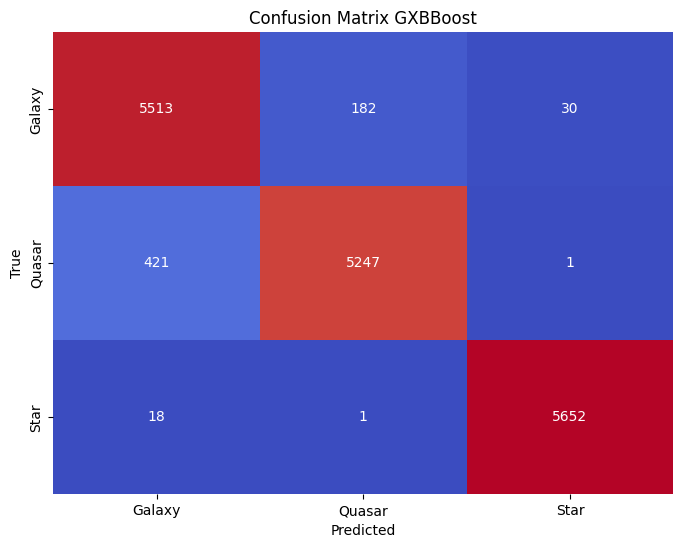

In [18]:
# Visualizing the confusion matrix 
# create a label list for the class values
label_list = ['Galaxy', 'Quasar', 'Star']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=label_list, yticklabels=label_list)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix GXBBoost')
plt.show()



<div style="background-color:#eef9f1; border-left: 6px solid #8bc34a; padding: 10px;">
    <h3 style="color:#8bc34a;">Peronal Analysis</h3>
    <p style="font-size: 14px; color:#333;"> For training the XGBoost, I used the same dataset as training data. The model performance is very well with Star than others, but with Galaxy and SQO has problem . I think the main reason for this can be  connected to the  input values.</p>
</div>